# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jerem\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [3]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(q="bitcoin", language="en", sort_by= "relevancy")
bitcoin_headlines

{'status': 'ok',
 'totalResults': 7581,
 'articles': [{'source': {'id': None, 'name': 'New York Times'},
   'author': 'Katie Benner',
   'title': 'Justice Dept. Announces Raft of Changes Meant to Deter Cyberthreats',
   'description': 'The moves came a week after the department made its largest financial seizure ever, confiscating over $3.6 billion worth of Bitcoin stolen in a 2016 hacking.',
   'url': 'https://www.nytimes.com/2022/02/17/us/politics/justice-department-cybersecurity.html',
   'urlToImage': 'https://static01.nyt.com/images/2022/02/17/us/politics/17dc-justice/merlin_199612353_b05bfb07-3da8-404e-8a75-221181e5d014-facebookJumbo.jpg',
   'publishedAt': '2022-02-17T23:51:49Z',
   'content': 'Even in cyberspace, the Department of Justice is able to use a tried and true investigative technique, following the money, Ms. Monaco said. Its what led us to Al Capone in the 30s. It helped us dest… [+1176 chars]'},
  {'source': {'id': 'the-verge', 'name': 'The Verge'},
   'author': 'El

In [5]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(q="ethereum", language="en", sort_by= "relevancy")
ethereum_headlines

{'status': 'ok',
 'totalResults': 3570,
 'articles': [{'source': {'id': 'wired', 'name': 'Wired'},
   'author': 'Shanti Escalante-De Mattei',
   'title': 'Web3 Threatens to Segregate Our Online Lives',
   'description': 'Governance tokens seem like a tantalizing solution to content moderation struggles. They only give the appearance of democracy.',
   'url': 'https://www.wired.com/story/web3-governance-tokens-cryptocurrency-content-moderation/',
   'urlToImage': 'https://media.wired.com/photos/621d66c7ea3b8f283853aa29/191:100/w_1280,c_limit/Web3-Threatens-to-Segregate-Our-Online-Lives.jpg',
   'publishedAt': '2022-03-01T14:00:00Z',
   'content': 'In February, shit hit the fan in the usual way: An old tweet resurfaced. Brantly Millegan, director of operations at Ethereum Name Service (ENS), a web3 business, had written the following in May 201… [+3096 chars]'},
  {'source': {'id': None, 'name': 'Investorplace.com'},
   'author': 'InvestorPlace',
   'title': 'The Market Has Spoken, and I

In [6]:
# Create the Bitcoin sentiment scores DataFrame
articles = []
for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neg = results["neg"]
        neu = results["neu"]

        articles.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
        })
    except AttributeError:
        pass
btc = pd.DataFrame(articles)
btc.head()

,text,compound,positive,negative,neutral
0,"Even in cyberspace, the Department of Justice ...",0.7351,0.147,0.000,0.853
1,"When Russia invaded Ukraine, Niki Proshin was ...",0.0000,0.000,0.000,1.000
2,"""Bitcoin was seen by many of its libertarian-l...",-0.7713,0.000,0.169,0.831
3,Feb 22 (Reuters) - Bitcoin miners are feeling ...,-0.1779,0.046,0.067,0.887
4,March 1 (Reuters) - Bitcoin has leapt since Ru...,0.0000,0.000,0.000,1.000


In [7]:
# Create the Ethereum sentiment scores DataFrame
articles = []
for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neg = results["neg"]
        neu = results["neu"]

        articles.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
        })
    except AttributeError:
        pass
eth = pd.DataFrame(articles)
eth.head()

,text,compound,positive,negative,neutral
0,"In February, shit hit the fan in the usual way...",-0.3182,0.059,0.093,0.848
1,"Technical analysis isnt a perfect tool, but it...",-0.2498,0.000,0.059,0.941
2,Coinbase reported that the share of trading vo...,0.6705,0.188,0.000,0.812
3,Illustration by James Bareham / The Verge\r\n\...,-0.4588,0.000,0.083,0.917
4,"If it sounds too good to be true, youre not wr...",0.8340,0.236,0.050,0.713


In [8]:
# Describe the Bitcoin Sentiment
btc.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.018970,0.052900,0.043750,0.903300
std,0.427134,0.049112,0.061198,0.070857
min,-0.771300,0.000000,0.000000,0.739000
25%,-0.231275,0.000000,0.000000,0.853750
50%,0.000000,0.051500,0.000000,0.913000
75%,0.345300,0.078250,0.071000,0.952500
max,0.735100,0.152000,0.187000,1.000000


In [9]:
# Describe the Ethereum Sentiment
eth.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.161130,0.074750,0.030400,0.894800
std,0.411947,0.082856,0.041487,0.092358
min,-0.526700,0.000000,0.000000,0.692000
25%,-0.110175,0.000000,0.000000,0.841000
50%,0.000000,0.057500,0.000000,0.914500
75%,0.528675,0.120500,0.059000,0.967000
max,0.834000,0.249000,0.115000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Ethereum

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Instantiate the lemmatizer
wnl = WordNetLemmatizer()

# Create a list of stopwords
stop = stopwords.words('english')

# Expand the default stopwords list if necessary
stop.append("u")
stop.append("it'")
stop.append("'s")
stop.append("n't")
stop.append('…')
stop.append("\`")
stop.append('``')
stop.append('char')
stop.append("''")
stop = set(stop)

In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
   
    # Create a tokenized list of the words
    words = word_tokenize(text)
    
    # Remove the punctuation from text
    words = list(filter(lambda t : t not in punctuation, words))        
   
    # Convert the words to lowercase
    words = list(filter(lambda t : t.lower(), words))
    
    # Remove the stop words
    words = list(filter(lambda t : t.lower() not in stop, words)) 
    
    # Lemmatize words into root words
    tokens = [wnl.lemmatize(word) for word in words]
    
    return tokens

In [13]:
# Create a new tokens column for Bitcoin
btc["Tokens"] = btc.text.apply(tokenizer)
btc.head()

,text,compound,positive,negative,neutral,Tokens
0,"Even in cyberspace, the Department of Justice ...",0.7351,0.147,0.000,0.853,"[Even, cyberspace, Department, Justice, able, ..."
1,"When Russia invaded Ukraine, Niki Proshin was ...",0.0000,0.000,0.000,1.000,"[Russia, invaded, Ukraine, Niki, Proshin, alre..."
2,"""Bitcoin was seen by many of its libertarian-l...",-0.7713,0.000,0.169,0.831,"[Bitcoin, seen, many, libertarian-leaning, fan..."
3,Feb 22 (Reuters) - Bitcoin miners are feeling ...,-0.1779,0.046,0.067,0.887,"[Feb, 22, Reuters, Bitcoin, miner, feeling, he..."
4,March 1 (Reuters) - Bitcoin has leapt since Ru...,0.0000,0.000,0.000,1.000,"[March, 1, Reuters, Bitcoin, leapt, since, Rus..."


In [14]:
# Create a new tokens column for Ethereum
eth["Tokens"] = eth.text.apply(tokenizer)
eth.head()

,text,compound,positive,negative,neutral,Tokens
0,"In February, shit hit the fan in the usual way...",-0.3182,0.059,0.093,0.848,"[February, shit, hit, fan, usual, way, old, tw..."
1,"Technical analysis isnt a perfect tool, but it...",-0.2498,0.000,0.059,0.941,"[Technical, analysis, isnt, perfect, tool, may..."
2,Coinbase reported that the share of trading vo...,0.6705,0.188,0.000,0.812,"[Coinbase, reported, share, trading, volume, e..."
3,Illustration by James Bareham / The Verge\r\n\...,-0.4588,0.000,0.083,0.917,"[Illustration, James, Bareham, Verge, 15, mill..."
4,"If it sounds too good to be true, youre not wr...",0.8340,0.236,0.050,0.713,"[sound, good, true, youre, wrong, Yield, farmi..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
# Generate the Bitcoin N-grams where N=2
N = 2
grams = ngrams(tokenizer(btc.text.str.cat()), N)
Counter(grams).most_common(20)

[(('Reuters', 'Bitcoin'), 3),
 (('since', 'Russia'), 3),
 (('Russia', 'invaded'), 2),
 (('invaded', 'Ukraine'), 2),
 (('char', 'Bitcoin'), 2),
 (('char', 'Feb'), 2),
 (('char', 'March'), 2),
 (('March', '15'), 2),
 (('/li', 'li'), 2),
 (('char', 'SAN'), 2),
 (('SAN', 'SALVADOR'), 2),
 (('Reuters', 'El'), 2),
 (('El', 'Salvador'), 2),
 (('Central', 'American'), 2),
 (('15', 'million'), 2),
 (('Even', 'cyberspace'), 1),
 (('cyberspace', 'Department'), 1),
 (('Department', 'Justice'), 1),
 (('Justice', 'able'), 1),
 (('able', 'use'), 1)]

In [17]:
# Generate the Ethereum N-grams where N=2
N = 2
grams = ngrams(tokenizer(eth.text.str.cat()), N)
Counter(grams).most_common(20)

[(('char', 'cryptocurrency'), 3),
 (('cryptocurrency', 'boom'), 3),
 (('boom', 'past'), 3),
 (('past', 'year'), 3),
 (('year', 'helped'), 3),
 (('helped', 'propel'), 3),
 (('propel', 'newer'), 3),
 (('newer', 'market'), 3),
 (('market', 'record'), 3),
 (('record', 'height'), 3),
 (('height', 'digital'), 3),
 (('digital', 'collectible'), 3),
 (('collectible', 'known'), 3),
 (('known', 'NFTs'), 3),
 (('NFTs', 'fact'), 3),
 (('fact', 'total'), 3),
 (('total', 'NFT'), 3),
 (('NFT', 'sale'), 3),
 (('sale', 'volume'), 3),
 (('volume', 'hit'), 3)]

In [18]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [19]:
# Use token_count to get the top 10 words for Bitcoin
all_tokens = tokenizer(btc.text.str.cat())
token_count(all_tokens, 10)

[('char', 20),
 ('Russia', 7),
 ('Bitcoin', 7),
 ('Reuters', 7),
 ('Ukraine', 5),
 ('March', 5),
 ('cryptocurrency', 4),
 ('bitcoin', 4),
 ('15', 4),
 ('said', 3)]

In [20]:
# Use token_count to get the top 10 words for Ethereum
all_tokens = tokenizer(eth.text.str.cat())
token_count(all_tokens, 10)

[('char', 20),
 ('Ethereum', 6),
 ('volume', 5),
 ('past', 5),
 ('hit', 4),
 ('crypto', 4),
 ('year', 4),
 ('cryptocurrency', 4),
 ('NFTs', 4),
 ('billion', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

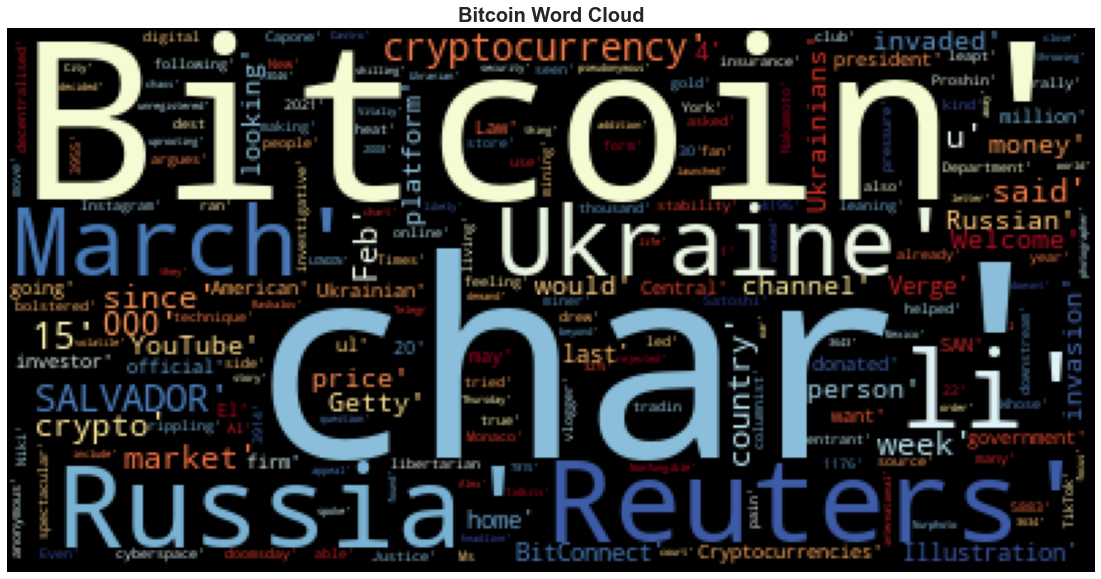

In [22]:
# Generate the Bitcoin word cloud
terms_list = str(btc["Tokens"].tolist())
wordcloud = WordCloud(colormap="RdYlBu").generate(terms_list)
plt.imshow(wordcloud)
plt.axis("off")
fontdict = {"fontsize": 20, "fontweight": "bold"}
plt.title("Bitcoin Word Cloud", fontdict=fontdict)
plt.show()

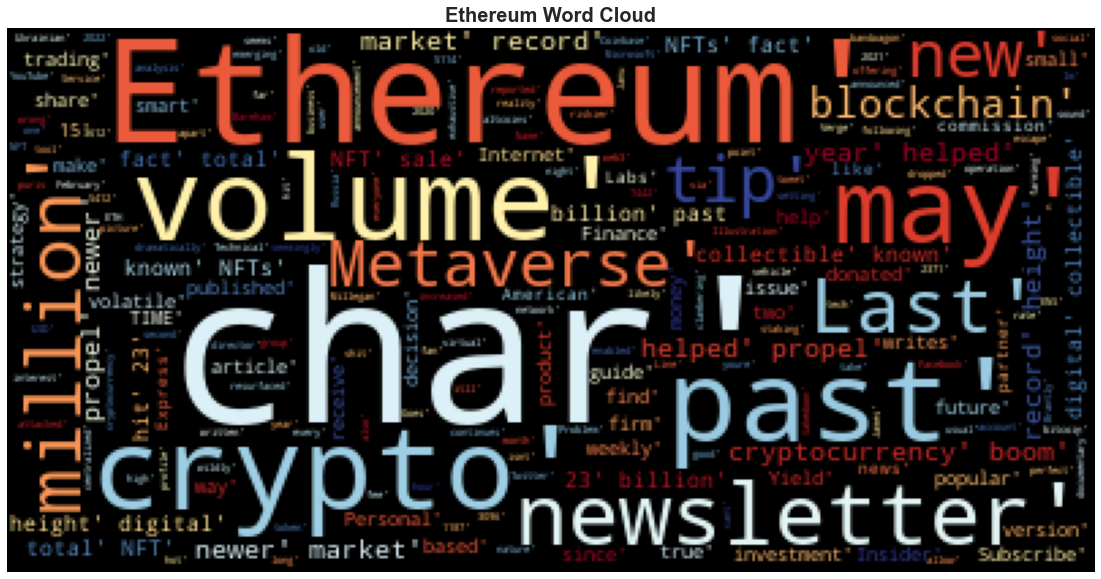

In [23]:
# Generate the Ethereum word cloud
terms_list = str(eth["Tokens"].tolist())
wordcloud = WordCloud(colormap="RdYlBu").generate(terms_list)
plt.imshow(wordcloud)
plt.axis("off")
fontdict = {"fontsize": 20, "fontweight": "bold"}
plt.title("Ethereum Word Cloud", fontdict=fontdict)
plt.show()

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [24]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [26]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [27]:
# Concatenate all of the Bitcoin text together
all_btc_text = btc.text.str.cat()
all_btc_text

'Even in cyberspace, the Department of Justice is able to use a tried and true investigative technique, following the money, Ms. Monaco said. Its what led us to Al Capone in the 30s. It helped us dest… [+1176 chars]When Russia invaded Ukraine, Niki Proshin was already a year into making a living as a vlogger — he had a YouTube channel, a TikTok channel, and an Instagram. He also ran an online Russian club for a… [+5883 chars]"Bitcoin was seen by many of its libertarian-leaning fans as a kind of doomsday insurance," argues a columnist in the New York Times, "a form of \'digital gold\' that would be a source of stability as … [+3914 chars]Feb 22 (Reuters) - Bitcoin miners are feeling the heat - and the pain\'s rippling downstream to pressure prices.\r\nThe cryptocurrency\'s spectacular rally in 2021 drew thousands of entrants into mining,… [+4196 chars]March 1 (Reuters) - Bitcoin has leapt since Russia\'s invasion of Ukraine, bolstered by people in those countries looking to store and mo

In [28]:
# Run the NER processor on all of the text
doc = nlp(all_btc_text)

# Add a title to the document
doc.user_data["title"] = "Bitcoin NER"

In [29]:
# Render the visualization
displacy.render(doc, style='ent')

In [30]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

the Department of Justice ORG
Monaco PERSON
Al Capone LOC
Russia GPE
Ukraine GPE
Niki Proshin PERSON
a year DATE
YouTube ORG
TikTok ORG
Instagram ORG
Russian NORP
the New York Times ORG
22 CARDINAL
Reuters ORG
2021 DATE
thousands CARDINAL
Reuters ORG
Russia GPE
Ukraine GPE
Satoshi Nakamoto PERSON
2008 DATE
Nonfungible Tidbits PERSON
this week DATE
Russia GPE
Ukraine GPE
Ukrainians NORP
Russian NORP
YouTube ORG
Alex Castro PERSON
Verge ORG
BitConnect ORG
Getty GPE
Russia GPE
last Thursday DATE
Ukranian NORP
Mexico City GPE
Telegr ORG
March 4 DATE
Reuters ORG
Russia GPE
Ukraine GPE
Russia GPE
15 CARDINAL
Reuters ORG
U.S. GPE
Joe Biden PERSON
Reuters ORG
BITCOIN PERSON
+6882 chars]<ul><li> ORG
Summary</li><li> WORK_OF_ART
Law firms</li><li>
 PERSON
documents</li></ul GPE
Ukrainian NORP
Tom Lee PERSON
Ukraine GPE
Shark Tank WORK_OF_ART
Kevin O'Leary's PERSON
100,000 MONEY
200,000 MONEY
300,000 MONEY
two-week DATE
Tuesday DATE
Russians NORP
Ukrainians NORP
March 11 DATE
Reuters ORG
El Salva

---

### Ethereum NER

In [31]:
# Concatenate all of the Ethereum text together
all_eth_text = eth.text.str.cat()
all_eth_text

'In February, shit hit the fan in the usual way: An old tweet resurfaced. Brantly Millegan, director of operations at Ethereum Name Service (ENS), a web3 business, had written the following in May 201… [+3096 chars]Technical analysis isnt a perfect tool, but it may point the way for Ethereum\r\nEthereum\xa0(ETH-USD\r\n) continues to be a volatile crypto investment. Crypto is volatile by nature Im not setting it apart … [+3612 chars]Coinbase reported that the share of trading volume for ethereum and other altcoins increased last year, while bitcoin\'s share dropped dramatically.\xa0\r\nBetween 2020 and 2021, ethereum trading volume in… [+1187 chars]Illustration by James Bareham / The Verge\r\n\n \n\n\n More than $15 million has been donated so far More than $15 million in cryptocurrency has been donated to Ukrainian groups since Russia attacked the c… [+7442 chars]If it sounds too good to be true, youre not wrong. Yield farming is riskier than staking. The tokens that are offering such 

In [32]:
# Run the NER processor on all of the text
doc = nlp(all_eth_text)

# Add a title to the document
doc.user_data["title"] = "Ethereum NER"

In [33]:
# Render the visualization
displacy.render(doc, style='ent')

In [34]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

February DATE
Ethereum Name Service ORG
ENS ORG
May 201 DATE
Ethereum ORG
ETH-USD ORG
Crypto PERSON
last year DATE
Between 2020 and 2021 DATE
James Bareham PERSON
More than $15 million MONEY
More than $15 million MONEY
Ukrainian GPE
Russia GPE
2022 DATE
Facebook ORG
Microsoft ORG
Twitter PRODUCT
Ethereum ORG
second ORDINAL
two months DATE
NFT ORG
two hours TIME
YouTube ORG
Waka Flacka Fla ORG
the past few years DATE
NFT ORG
$23 billion MONEY
TIME ORG
weekly DATE
TIME ORG
weekly DATE
Biden PERSON
Wednesday DATE
first ORDINAL
the past few years DATE
NFT ORG
$23 billion MONEY
the past few years DATE
NFT ORG
$23 billion MONEY
Ethereum ORG
American Express ORG
$450 million MONEY
Series EVENT
US GPE
over $7 billion MONEY
Russia GPE
Ukraine GPE
American Express ORG
days DATE
March 11 DATE
Yuga Labs PERSON
Meebits NORP
Larva Labs PERSON
more than a dozen CARDINAL
Ethereum ORG


---